In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print((x_train, y_train), (x_test, y_test))

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print(history)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8755 - loss: 0.4421 - val_accuracy: 0.9525 - val_loss: 0.1594
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9655 - loss: 0.1193 - val_accuracy: 0.9702 - val_loss: 0.1010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9767 - loss: 0.0763 - val_accuracy: 0.9726 - val_loss: 0.0888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9746 - val_loss: 0.0829
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9874 - loss: 0.0419 - val_accuracy: 0.9741 - val_loss: 0.0833


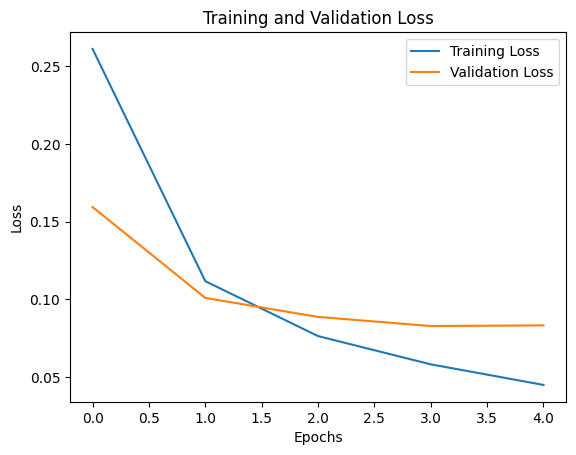

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
y_pred = model.predict(x_test)
print("y_pred:",y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
y_pred: [[7.35082717e-10 3.17392668e-09 3.75634090e-06 ... 9.99161243e-01
  1.09027503e-07 2.50983635e-06]
 [3.80702359e-09 1.18218968e-05 9.99978185e-01 ... 1.32285936e-12
  9.67862979e-06 1.72942823e-13]
 [1.97192151e-07 9.99397278e-01 1.24579514e-04 ... 2.43569652e-04
  1.39576310e-04 8.14523503e-07]
 ...
 [5.40367881e-13 8.49892323e-10 1.63601667e-11 ... 7.72947374e-07
  4.39542146e-06 8.39041022e-05]
 [1.47915902e-10 1.43505294e-11 4.59573308e-12 ... 3.30119432e-10
  9.80350742e-05 1.78374535e-12]
 [1.29601121e-08 8.60734331e-11 2.75779826e-06 ... 2.79114812e-13
  8.59523952e-10 2.26367480e-10]]


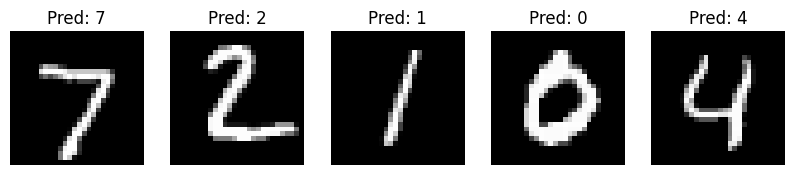

In [20]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {tf.argmax(y_pred[i]).numpy()}')
    plt.axis('off')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9741 - loss: 0.0833
Test accuracy: 0.9740999937057495
